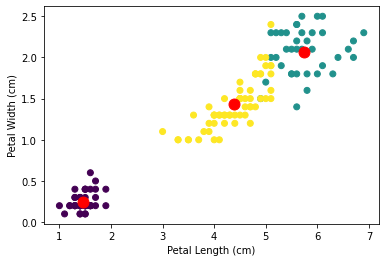

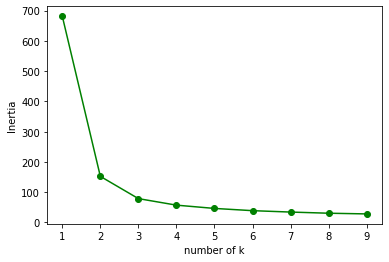

In [1]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
Data_iris = iris.data

from sklearn.cluster import KMeans

KMNS = KMeans(n_clusters = 3)
KMNS.fit(Data_iris)
#predict labels
Labels = KMNS.predict(Data_iris)

Ctn = KMNS.cluster_centers_
plt.scatter(Data_iris[:,2], Data_iris[:,3], c = Labels)
plt.scatter(Ctn[:,2], Ctn[:,3], marker = 'o', color= 'red', s=120)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

KMNS.inertia_
K_inertia = []
for i in range (1,10):
    KMNS = KMeans (n_clusters= i, random_state=(44))
    KMNS.fit(Data_iris)
    K_inertia.append(KMNS.inertia_)
    
plt.plot(range(1,10), K_inertia, color= 'green', marker = 'o')
plt.xlabel('number of k')
plt.ylabel('Inertia')
plt.show()

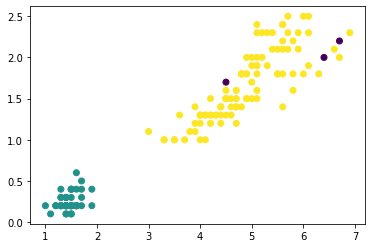

In [2]:
#DBSCAN
from sklearn.cluster import DBSCAN
DBS = DBSCAN(eps=0.7, min_samples=4)
DBS.fit(Data_iris)

Labels = DBS.labels_
plt.scatter(Data_iris[:,2], Data_iris[:,3], c= Labels)
plt.show()

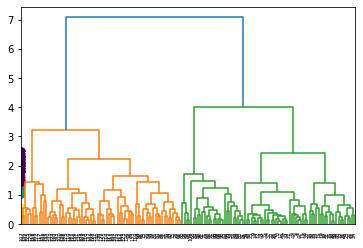

In [3]:
#Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

HR = linkage(Data_iris, method='complete')
DND = dendrogram(HR)
Labels = fcluster(HR, 4, criterion='distance')
plt.scatter(Data_iris[:,2], Data_iris[:,3], c=Labels)
plt.show()

In [4]:
#SVR Hyper Prameter Tuning
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Boston_P = load_boston()
x = Boston_P.data
y = Boston_P.target

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf', 'linear'], 'gamma':[1, 0.1, 0.01]}
grid = GridSearchCV(SVR(), parameters,
                    refit=True, verbose=2, scoring='neg_mean_squared_error')
grid.fit(x,y)
best_params = grid.best_params_

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   0.1s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.1s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=1, kernel=linear; total time=   4.6s
[CV] END .............................gamma=1, kernel=linear; total time=   5.6s
[CV] END .............................gamma=1, kernel=linear; total time=   5.1s
[CV] END .............................gamma=1, kernel=linear; total time=   7.2s
[CV] END .............................gamma=1, kernel=linear; total time=   4.7s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

In [5]:
#K-Means hyper parameters
K_inertia =[]
for i in range(1,10):
    KMNS = KMeans(n_clusters=i, random_state=44)
    KMNS.fit(Data_iris)
    K_inertia.append(KMNS.inertia_)

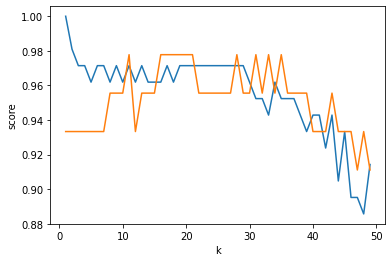

In [6]:
#K-NN hyper parameter tuning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30, train_size=0.70,
                                                    random_state=22, shuffle=True, stratify=y)
from sklearn.neighbors import KNeighborsClassifier
kNN_accuracy_train =[]
kNN_accuracy_test =[]

for k in range(1, 50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    kNN.fit(X_train,y_train)
    kNN_accuracy_train.append(kNN.score(X_train,y_train))
    kNN_accuracy_test.append(kNN.score(X_test,y_test))

plt.plot(np.arange(1,50), kNN_accuracy_train, label= 'train')
plt.plot(np.arange(1,50), kNN_accuracy_test, label= 'test')
plt.xlabel('k')
plt.ylabel('score')
plt.show()